In [16]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np

In [17]:
import matplotlib.pyplot as plt
from cycler import cycler
from random import sample,seed
seed(12434)

default_cycler = cycler(linestyle=sample(['--', '-.'],2))
default_cycler = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

## Read CSV

In [18]:
# textWidget=widgets.Text()
# print('Enter a csv filename:')
# display(textWidget)

# df = None

# def handle_submit(sender):
#     global df
#     filename = textWidget.value
#     print("Reading {}".format(filename))

# textWidget.on_submit(handle_submit)

from glob import glob

fn = glob("*.csv")
df = pd.read_csv(fn[0])

df

,step,task,acc_pretrain_T0,acc_pretrain_T1,acc_pretrain_T2,acc_pretrain_T3,acc_pretrain_T4,online_acc_cont_conv_sgd_0.01,repeat_cont_conv_sgd_0.01,times_cont_conv_sgd_0.01,...,forget_conr25_sgd_0.01_T2,forget_conr25_sgd_0.01_T3,forget_conr25_sgd_0.01_T4,forget_avg_conr25_sgd_0.01,forget_conr50_sgd_0.01_T0,forget_conr50_sgd_0.01_T1,forget_conr50_sgd_0.01_T2,forget_conr50_sgd_0.01_T3,forget_conr50_sgd_0.01_T4,forget_avg_conr50_sgd_0.01
0,0,0,0.86,0.738,0.61,0.804,0.878,0.87500,3,1.648360,...,0.000,0.000,0.000,0.0018,0.024,0.014,0.000,0.000,0.000,0.0076
1,1,0,0.86,0.738,0.61,0.804,0.878,0.93750,46,1.430580,...,0.000,0.000,0.018,0.0084,0.000,0.034,0.000,0.000,0.019,0.0106
2,2,0,0.86,0.738,0.61,0.804,0.878,0.87500,16,0.652707,...,0.000,0.000,0.029,0.0110,0.000,0.038,0.000,0.000,0.041,0.0158
3,3,0,0.86,0.738,0.61,0.804,0.878,0.87500,8,0.464132,...,0.000,0.000,0.026,0.0124,0.000,0.051,0.000,0.000,0.034,0.0170
4,4,0,0.86,0.738,0.61,0.804,0.878,0.93750,30,0.947668,...,0.001,0.000,0.032,0.0142,0.000,0.052,0.002,0.001,0.039,0.0188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,4,0.86,0.738,0.61,0.804,0.878,1.00000,1,0.485292,...,0.271,0.094,0.004,0.1888,0.296,0.370,0.322,0.101,0.007,0.2192
1496,1496,4,0.86,0.738,0.61,0.804,0.878,0.93750,4,0.541884,...,0.265,0.090,0.002,0.1888,0.305,0.387,0.308,0.102,0.007,0.2218
1497,1497,4,0.86,0.738,0.61,0.804,0.878,0.93750,9,0.704411,...,0.266,0.087,0.004,0.1892,0.294,0.388,0.314,0.101,0.007,0.2208
1498,1498,4,0.86,0.738,0.61,0.804,0.878,1.00000,11,0.755454,...,0.270,0.094,0.004,0.1900,0.294,0.369,0.321,0.103,0.007,0.2188


In [19]:

all_methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "cont_conv", "drifta_conv", "2drifta_conv"]
lmethod     = ["\catf{}", "\conr[1]{}", "\conr[10]{}", "\conr[25]{}", "\conr[50]{}", "\driftadyn[50]{}", "\ddriftadyn[50]{}", "\conrconv", "\driftaconv", "\ddriftaconv"]

latex_method_name = {}

for k, method in enumerate(all_methods):
    latex_method_name[method]=lmethod[k]


methods = ["catf", "conr1", "conr10", "conr25", "conr50", "drifta" "2drifta", "cont_conv", "drifta_conv", "2drifta_conv"]
#methods = ["catf", "conr1", "conr10", "drifta", "2drifta"]
print(df.columns)

Index(['step', 'task', 'acc_pretrain_T0', 'acc_pretrain_T1', 'acc_pretrain_T2',
       'acc_pretrain_T3', 'acc_pretrain_T4', 'online_acc_cont_conv_sgd_0.01',
       'repeat_cont_conv_sgd_0.01', 'times_cont_conv_sgd_0.01',
       ...
       'forget_conr25_sgd_0.01_T2', 'forget_conr25_sgd_0.01_T3',
       'forget_conr25_sgd_0.01_T4', 'forget_avg_conr25_sgd_0.01',
       'forget_conr50_sgd_0.01_T0', 'forget_conr50_sgd_0.01_T1',
       'forget_conr50_sgd_0.01_T2', 'forget_conr50_sgd_0.01_T3',
       'forget_conr50_sgd_0.01_T4', 'forget_avg_conr50_sgd_0.01'],
      dtype='object', length=104)


## Compute times

In [20]:
# columns = []

# # for lr in [0.01]:
# #     for opt in ["sgd"]: 
# #         for method in ["drifta", "2drifta", "drifta_conv", "2drifta_conv"]:
# #             columns += ["times_{}_{}_{}".format(method, opt, lr)]

# for lr in [0.01]:
#     for opt in ["sgd"]: 
#         for method in ["2drifta1", "2drifta10", "2drifta25", "2drifta_conv", "2drifta"]:
#             columns += ["times_{}_{}_{}".format(method, opt, lr)]


# for lr in [0.01]:
#     for opt in ["sgd"]: 
#         for method in ["drifta1", "drifta10", "drifta25",  "drifta_conv", "drifta"]:
#             columns += ["times_{}_{}_{}".format(method, opt, lr)]
            
# for lr in [0.01]:
#     for opt in ["sgd"]: 
#         for method in [ "conr1", "conr10", "conr25", "conr50", "cont_conv"]:
#             columns += ["times_{}_{}_{}".format(method, opt, lr)]            
            
# times = df[columns].cumsum()
# times

## Plot times

In [21]:
#times.plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)

## Compute number of training batches

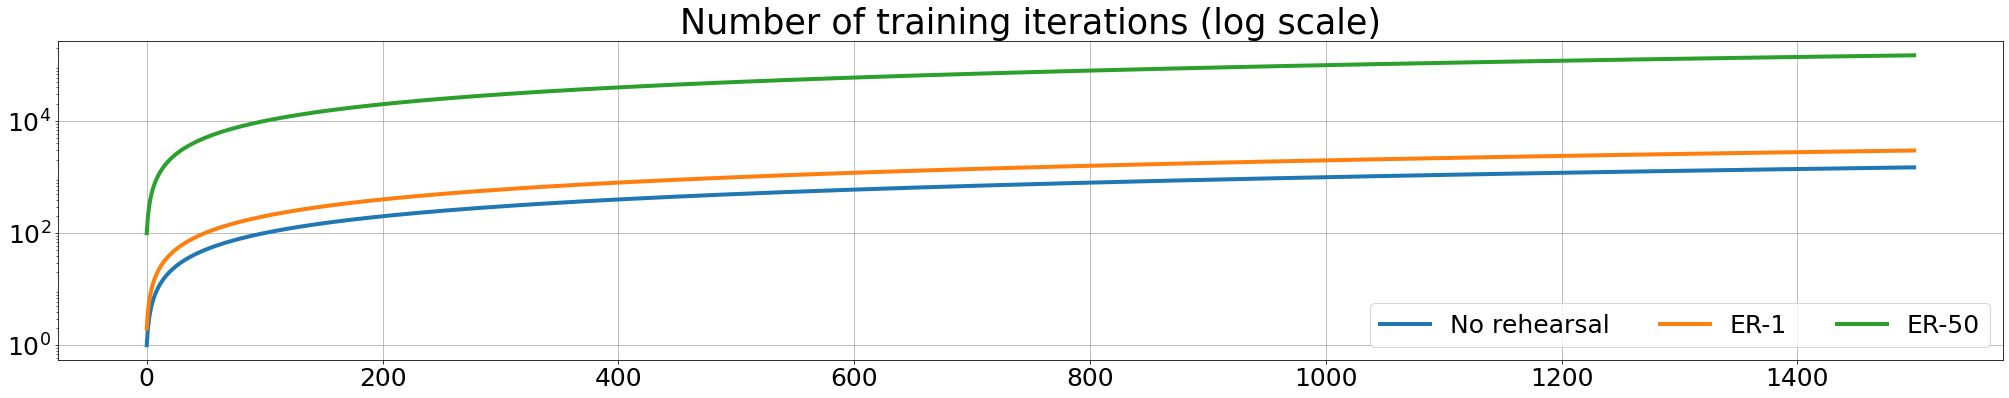

In [22]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in [ "catf", "conr1", "conr50",]:
            columns += ["train_batches_{}_{}_{}".format(method, opt, lr)]
           

train_batches=df[columns].cumsum()

train_batches
px = 1/plt.rcParams['figure.dpi'] 
center=0
window=3000
train_batches.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(2000*px,400*px), logy=True, linewidth=4, alpha=1)


name_map = \
{col:col.replace("train_batches_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}



name_map["train_batches_catf_sgd_0.01"] = "No rehearsal"

#print(name_map)
plt.title('Number of training iterations (log scale)',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=5, fontsize=25)
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks([1,100,10000])
plt.savefig("cifar10-exp5-buf50-train_batches.png")



## Plot average accuracy (on all tasks) per method

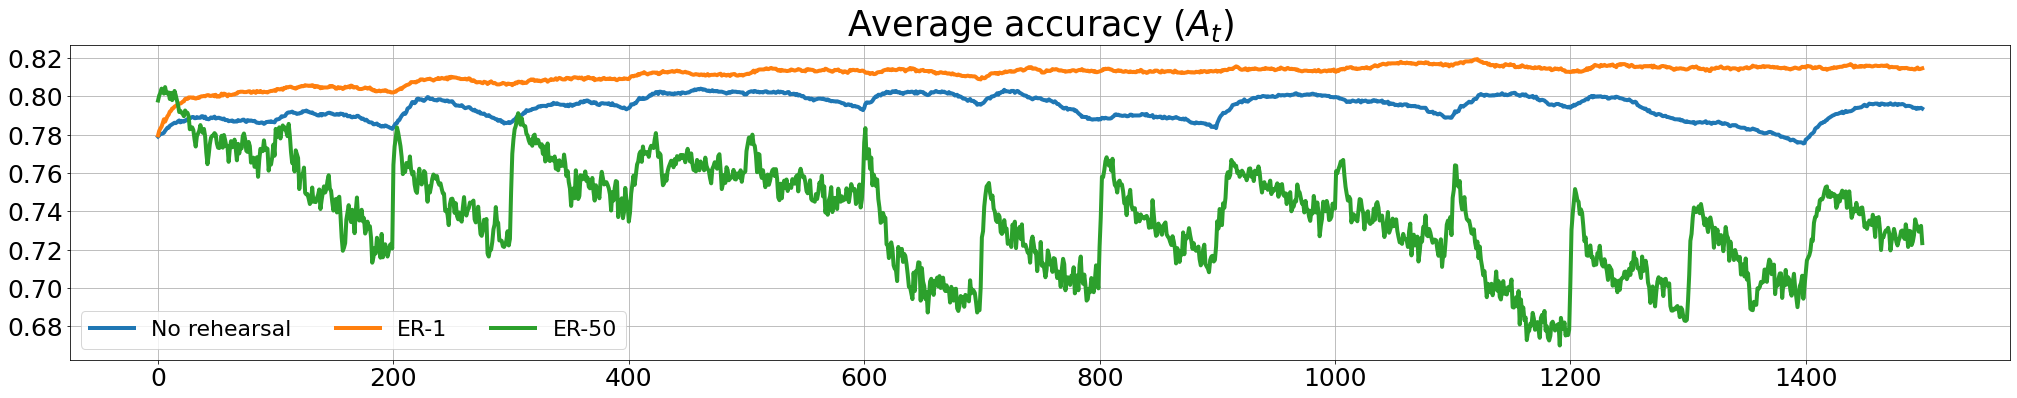

In [23]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in [ "catf", "conr1", "conr50",]:
            columns += ["acc_avg_{}_{}_{}".format(method, opt, lr)]


center=0
window=3000
name_map = {col:col.replace("acc_avg_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
#print(name_map)
px = 1/plt.rcParams['figure.dpi'] 
#df[columns].plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)

acc_avg = df[columns ]

acc_avg.plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)

name_map["acc_avg_pretrain"]="Baseline"
name_map["acc_avg_catf_sgd_0.01"] = "No rehearsal"

plt.title('Average accuracy $(A_t)$',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=5, loc='lower left', fontsize=22)
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig("cifar10-exp5-buf50-avg-acc.png")



## Zoom in an plot average accuracy up close

In [24]:
#center=400
#window=50
#df[columns + ["acc_avg_pretrain"]].loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)


## Forgetting average 

In [25]:
#columns = []
#for opt in ["sgd", "adam"]: 
#    for method in methods:
#        columns += ["forget_avg_{}_{}_{}".format(method, opt, lr)]
#df[columns].plot(grid=True, figsize=(15,10))

## Zoom in on forgetting average

In [26]:
#center=1200
#window=250
#df[columns].loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)

## Running accuracy (accuracy only on the current task)

{'acc_run_catf_sgd_0.01': 'CATF', 'acc_run_conr1_sgd_0.01': 'ER-1', 'acc_run_conr50_sgd_0.01': 'ER-50'}


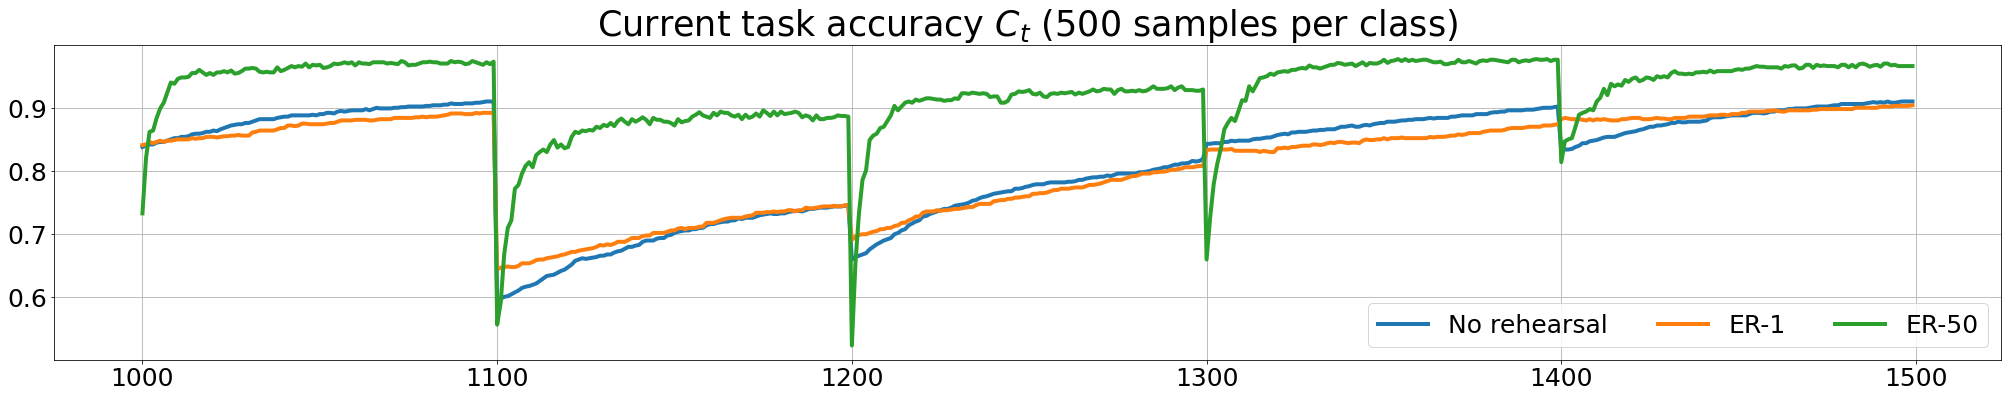

In [27]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
      for method in ["catf","conr1", "conr50", ]:
            mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, opt, lr, int(row['task']))]
            column_name = 'acc_run_{}_{}_{}'.format(method, opt, lr)
            columns += [column_name]
            df[column_name] = df.apply(mapper, axis=1)
        

name_map = {col:col.replace("acc_run_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
print(name_map)

running_acc = df[columns].iloc[1000:1500]

#print(name_map)
px = 1/plt.rcParams['figure.dpi'] 

name_map["acc_run_catf_sgd_0.01"] = "No rehearsal"


center=0
window=3000
#running_acc.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)
running_acc.plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)


plt.title('Current task accuracy $C_t$ (500 samples per class)',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=4, fontsize=25,  loc='lower right')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks([ 0.6, 0.7, 0.8, 0.9 ])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig("cifar10-exp5-buf50-running-acc.png")

# Zoom in on running accuracy

In [28]:
# center=100
# window=100
# running_acc.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15,8),colormap="tab20", linewidth=4, alpha=0.7)
#df.columns[20:50]
#df[["diff_X_t_drifta_conv_sgd_0.01", "detected_drift_drifta_conv_sgd_0.01"]].loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15, 10))
#df[["detected_drift_drifta_conv_sgd_0.01"]].astype(int).loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(15, 10))
#df[["Z_t_drifta_conv_sgd_0.01"]].plot(figsize=(15, 10))
#df[["detected_drift_drifta_sgd_0.01"]].plot(figsize=(15, 10))

# Online Accuracy

{'online_acc_catf_sgd_0.01': 'CATF', 'online_acc_conr1_sgd_0.01': 'ER-1', 'online_acc_conr50_sgd_0.01': 'ER-50'}


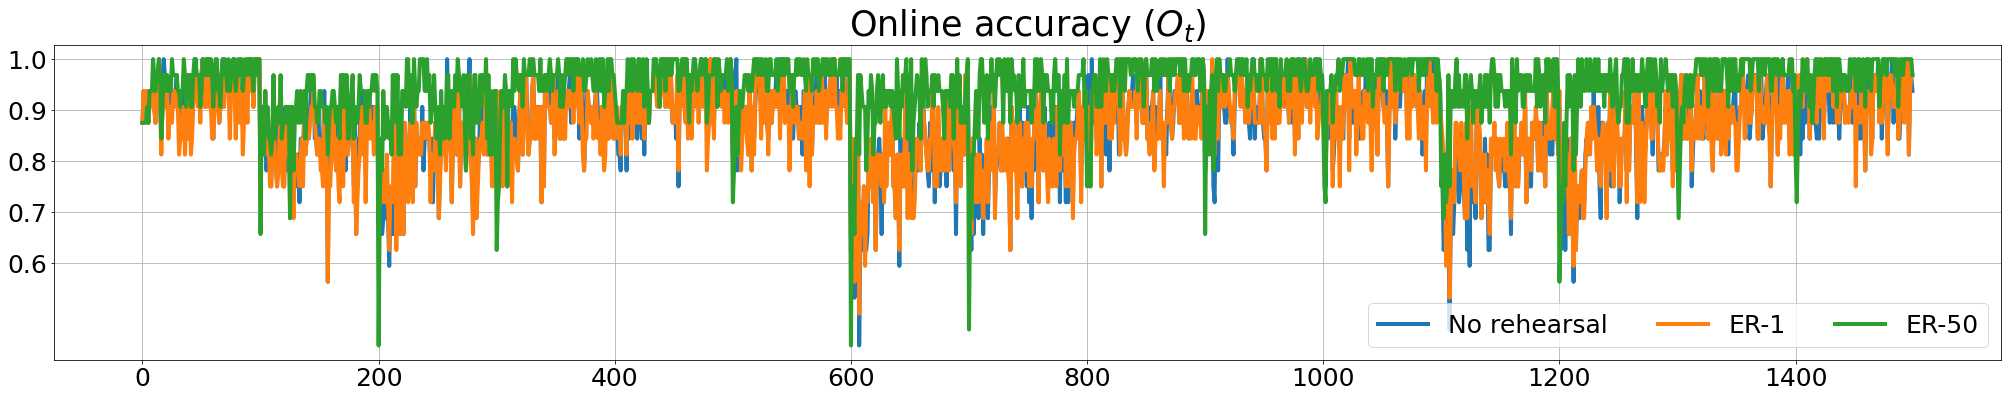

In [29]:
columns = []

for lr in [0.01]:
    for opt in ["sgd"]: 
        for method in ["catf", "conr1", "conr50",]:
            columns += ["online_acc_{}_{}_{}".format(method, opt, lr)]  

        
name_map = {col:col.replace("online_acc_","").replace("_sgd_0.01","").upper().replace("CONR","ER-").replace("DRIFTA","DRIFTA-DYN-").replace("DRIFTA-DYN-_CONV", "DRIFTA-CONV")  for col in columns}
print(name_map)

online_acc = df[columns]

#print(name_map)
px = 1/plt.rcParams['figure.dpi'] 

name_map["online_acc_catf_sgd_0.01"] = "No rehearsal"
center=0
window=3000
online_acc.loc[(df["step"]>=center-window/2) & (df["step"]<=center+window/2)].plot(figsize=(2000*px,400*px), linewidth=4, alpha=1)
plt.title('Online accuracy $(O_t)$',fontsize=35, loc='center')
plt.legend(name_map.values(),ncol=3, fontsize=25,  loc='lower right')
plt.grid()
plt.tight_layout(pad=1.5)
plt.yticks(fontsize=25)
plt.yticks([0.6, 0.7, 0.8, 0.9, 1])
plt.xticks(fontsize=25)
plt.savefig("cifar10-exp5-buf50-online-acc.png")


## Create tables

In [30]:
# metrics = {}
# _stats  = [\
#           "train_batches", "acc_avg", "acc_run", "online_acc"]

# lstats = [\
#           "$N_{t}$", "$\\bar{A}$",  \
#           "$\\bar{C}_{t}$",  \
#           "$\\bar{O}_{t}$"]

# LATEX_STATS = {s:ls for s,ls in zip(_stats,lstats)}

# stats  = [\
#           "train_batches", \
#           "acc_avg", \
#           "acc_run", \
#           "online_acc"]

# methods     =  ["catf", "conr1", "conr10", "conr25", "conr50", "drifta50", "2drifta50", "drifta_conv",  "2drifta_conv"]
# lr      = [0.01]
# opt     = ["sgd"]

# ################################################################################
# columns = []
# for llr in lr:
#     for lopt in opt: 
#         for method in methods:
#             columns += ["train_batches_{}_{}_{}".format(method, lopt, llr)]

# train_batches=df[columns].cumsum()
# metrics['train_batches'] = df[columns].sum()
# ################################################################################







# ################################################################################
# columns = []
# for llr in lr:
#     for lopt in opt: 
#         for method in methods:
#             columns += ["acc_avg_{}_{}_{}".format(method, lopt, llr)]



# metrics['acc_avg'] = df[columns].mean()
# ################################################################################




# ################################################################################
# columns = []
# for llr in lr:
#     for lopt in opt:
#         for method in methods:
#             mapper = lambda row: row['acc_{}_{}_{}_T{}'.format(method, lopt, llr, int(row['task']))]
#             column_name = 'acc_run_{}_{}_{}'.format(method, lopt, llr)
#             columns += [column_name]
#             df[column_name] = df.apply(mapper, axis=1)

# running_acc = df[columns]
# metrics['acc_run'] = df[columns].mean()
# ################################################################################




# ################################################################################
# columns = []
# for llr in lr:
#     for lopt in opt:
#         for method in methods:
#             columns += ["online_acc_{}_{}_{}".format(method, lopt, llr)]

# online_acc = df[columns]
# metrics['online_acc'] = df[columns].mean()
# ################################################################################


# print('\\begin{table}[hbt!]')
# print('\\centering')
# print('\\begin{tabular}')
# print('{|l|c||c|||c||c|}')
# print('\\hline')

# ROWS = metrics['train_batches'].keys()

# print(ROWS)

# first_row = 'Method'
# for stat in stats:
#     first_row += ' & '+LATEX_STATS[stat]
# print(first_row+"\\"+'\\')
# for i, name in enumerate(ROWS):
#     name = name.replace('train_batches_','').replace('_sgd_0.01', '')
#     # print('{} & '.format(name), end=' ')
#     print('{}'.format(latex_method_name[name]), end='')
#     for stat in stats:
#         res = metrics[stat].values[i]
#         print(' & {}'.format(np.round(res, decimals=3)), end='')
#     print("\\\\")
#     print("\n\\hline")

# print('\end{tabular}')
# print('\end{table}')